<a href="https://colab.research.google.com/github/sudharshanpaul/Deep-Learning/blob/main/CNN/Optimize_CNNmodel_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.8 MB/s eta 0:00:00


## Create CNN model and Optimize it using Keras Tuner

In [2]:
import tensorflow as tf
import numpy as np
import keras_tuner

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
train_images[0].shape

(28, 28)

In [8]:
train_images = train_images.reshape(len(train_images), 28, 28, 1)
test_images = test_images.reshape(len(test_images), 28, 28, 1)

In [19]:
def built_model(hp):
  model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(
          filters = hp.Int('conv_1_filter', min_value= 32, max_value= 128, step= 16),
          kernel_size = hp.Choice('conv_1_kernel', values= [3, 5]),
          activation = 'relu',
          input_shape = (28, 28, 1)
      ),
      tf.keras.layers.Conv2D(
          filters = hp.Int('conv_2_filter', min_value= 32, max_value = 128, step = 16),
          kernel_size = hp.Choice('conv_2_kernel', values= [3, 5]),
          activation = 'relu'
      ),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(
          units = hp.Int('dense_1_units', min_value = 32, max_value = 128, step = 16),
          activation = 'relu'
      ),
      tf.keras.layers.Dense(10, activation = 'softmax')
  ])

  model.compile(optimizer = tf.keras.optimizers.Adam(hp.Choice('learning_rate', values= [1e-2, 1e-3])),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [20]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [21]:
tuner_search = RandomSearch(
    built_model,
    objective= 'val_accuracy',
    max_trials= 5,
    directory= 'output',
    project_name= 'Mnist Fashion'
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
tuner_search.search(train_images, train_labels, epochs= 3, validation_split= 0.1)

Trial 5 Complete [00h 00m 43s]
val_accuracy: 0.906000018119812

Best val_accuracy So Far: 0.9101666808128357
Total elapsed time: 00h 03m 06s


In [23]:
model = tuner_search.get_best_models(num_models = 1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 96)             │     1,486,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,513,866 (5.77 MB)

 Trainable params: 1,513,866 (5.77 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9457 - loss: 0.1472 - val_accuracy: 0.9108 - val_loss: 0.2832
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9629 - loss: 0.1008 - val_accuracy: 0.9138 - val_loss: 0.2839
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9738 - loss: 0.0707 - val_accuracy: 0.9125 - val_loss: 0.3175
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9797 - loss: 0.0558 - val_accuracy: 0.9038 - val_loss: 0.3850
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9854 - loss: 0.0408 - val_accuracy: 0.9123 - val_loss: 0.4265
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9898 - loss: 0.0289 - val_accuracy: 0.9187 - val_loss: 0.4319
Epoch 10/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9909 - loss: 0.0244 - val_accuracy: 0.9093 - val_loss: 0.5107


In [26]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [27]:
predicted_labels = np.argmax(predictions, axis=1)

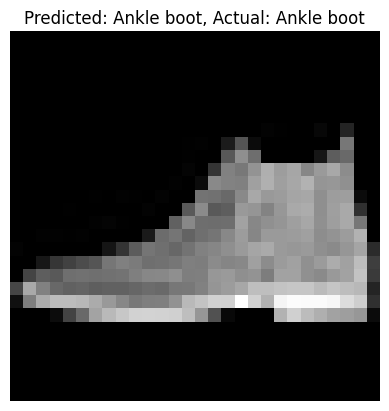

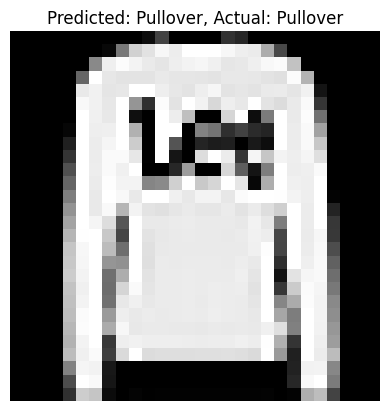

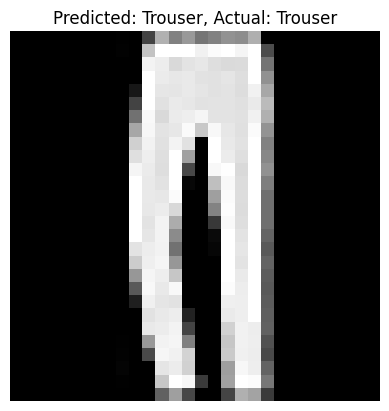

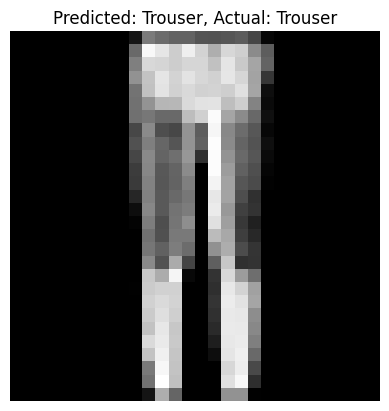

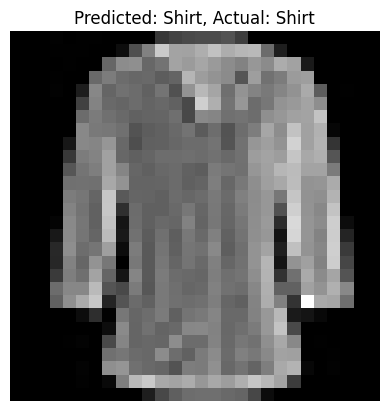

In [28]:
import matplotlib.pyplot as plt

# Class names for fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show first 5 test images with predictions
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {class_names[predicted_labels[i]]}, Actual: {class_names[test_labels[i]]}")
    plt.axis('off')
    plt.show()

In [44]:
from tensorflow.keras.preprocessing import image
from PIL import ImageOps


testing_image = image.load_img(path='/content/mens-shirt.webp', color_mode='grayscale', target_size=(28, 28))
testing_image = ImageOps.invert(testing_image)
testing_image = image.img_to_array(testing_image)
testing_image = testing_image/255.0
testing_image = np.expand_dims(testing_image, axis=0)

prediction = model.predict(testing_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [45]:
print(prediction)

[[1.6651150e-04 2.0690812e-12 1.0020342e-04 1.0877549e-04 1.1653735e-06
  1.4874124e-12 9.9962139e-01 1.4367739e-09 1.8362946e-06 6.2609992e-08]]


In [46]:
predicted_label = np.argmax(prediction)
print(predicted_label)

6


Predicted class: Shirt


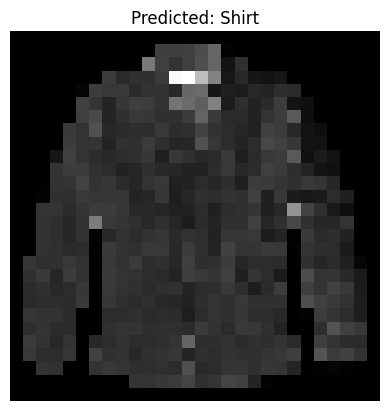

In [47]:
# Class names in Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Predicted class:", class_names[predicted_label])

# Optionally show the image
plt.imshow(testing_image[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {class_names[predicted_label]}")
plt.axis('off')
plt.show()
